<a href="https://colab.research.google.com/github/OC112030/MMFADataset/blob/main/%E4%BD%9C%E6%A5%AD1_ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import re

# ===== 讀取 Excel =====
excel_file_path = '/content/train_Data.xlsx'
df = pd.read_excel(excel_file_path)
df.head()

,ID,label,content_cleaned
0,1,0,葉黃素、益生菌、魚油、蔓越莓錠。你需要的保健品️日本味王全部都有。家裡備著日本味王保健品。好...
1,2,1,海底椰是一種夏季常見的湯料以清燥熱、止咳功效顯著而聞名且具有滋陰補腎、潤肺養顏、強壯身體機能...
2,3,0,杏輝活芯升級版。健康從芯開始。一整天的會議轟炸感覺精神不濟、提不起勁只想癱在床上。趕公車、爬...
3,4,1,淨亮效果AAA擊退暗沉更快速亮澤肌防護AAA光澤AAA。你是否擁有以下肌膚問題:肌膚蠟黃暗沉...
4,5,0,醫學實證000有感排便順暢。保證投入菌數高達000億。益生菌AAA益生元AAA後生元。調整體...


In [112]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['content_cleaned']
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=100,  # 100 samples for the test set
    stratify=y,     # Stratify based on the 'label' column
    random_state=42 # for reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of labels in y_train:")
display(y_train.value_counts())

print("\nDistribution of labels in y_test:")
display(y_test.value_counts())

Shape of X_train: (1442,)
Shape of X_test: (100,)
Shape of y_train: (1442,)
Shape of y_test: (100,)

Distribution of labels in y_train:


,count
label,
1,721
0,721



Distribution of labels in y_test:


,count
label,
0,50
1,50


In [113]:
import jieba

def segment_text(text):
    if isinstance(text, str):
        # Perform word segmentation
        seg_list = jieba.cut(text, cut_all=False) # cut_all=False for accurate mode
        return " ".join(seg_list)
    else:
        return ""

# Apply word segmentation to the cleaned content in both training and testing sets
X_train_segmented = X_train.apply(segment_text)
X_test_segmented = X_test.apply(segment_text)

print("Original X_train sample:")
display(X_train.head())

print("\nSegmented X_train sample:")
display(X_train_segmented.head())

print("\nOriginal X_test sample:")
display(X_test.head())

print("\nSegmented X_test sample:")
display(X_test_segmented.head())

Original X_train sample:


,content_cleaned
895,打破年齡設限‧看見青春立體。0AAA。撐補成分歲月細節一股腦地顯現在外表。支‧撐‧力000A...
187,兒童專科舒緩情緒消化提升敏感調理全台最足量健康食品變聰明變聰明的零食天然增加學習效率針對敏弱...
1440,0%增稠000%香料000%色素。維持消化道機能。日本專利膳食纖維多元益生菌。黃金比例口感細...
601,小胸救星升AAA不難。小胸&大胸女孩是不是有以下煩惱。撐不起衣服。哺乳後ㄋㄋ大縮水。美型拉提...
69,便秘救星、減肥聖品、減肥瘦瘦水、便祕必喝、便祕必喝、被封是減肥&解便秘聖品、便祕必喝、減肥聖...



Segmented X_train sample:


,content_cleaned
895,打破 年齡 設限 ‧ 看見 青春 立體 。 0AAA 。 撐補 成分 歲 月 細節 一股 腦...
187,兒童 專科 舒緩 情緒 消化 提升 敏感 調理 全台 最 足量 健康 食品 變聰明 變聰明 ...
1440,0% 增稠 000% 香料 000% 色素 。 維持 消化道 機能 。 日本 專利 膳食 纖...
601,小胸 救星 升 AAA 不難 。 小胸 & 大胸 女孩 是不是 有 以下 煩惱 。 撐 不起...
69,便秘 救星 、 減肥 聖品 、 減 肥瘦 瘦水 、 便 祕 必 喝 、 便 祕 必 喝 、 ...



Original X_test sample:


,content_cleaned
1078,享受尚好生活。享食尚健字號甘甘好活力加值組黃金組合甘甘好膠囊衛部健食字第AAA000號專為您...
1318,超模之鑰。防溢方案。官網000下殺000典悅生醫AAA搭配營養素幫助調節生理機能維持身體健康...
1348,商品。0益生菌益生質互利共生。0項全球專利後生元調整體質。幫助維持消化道機能。0色素、0人工...
89,抗藍光護眼軟糖。不如就給他吃抗藍光軟糖吧。吸收強光、過濾藍光、保護眼睛。適合族群:長時間盯著...
718,體力、美力一次擁有。0種AAA群完整組合。0合000美妍配方讓妳青春好自信。長效緩釋持續釋放...



Segmented X_test sample:


,content_cleaned
1078,享受 尚好 生活 。 享食 尚健字號 甘甘好 活力 加值 組黃金 組合 甘甘好 膠囊 衛部 ...
1318,超模 之 鑰 。 防溢 方案 。 官網 000 下 殺 000 典悅 生醫 AAA 搭配 營...
1348,商品 。 0 益生菌 益生質 互利 共生 。 0 項 全球 專利後生 元 調整 體質 。 幫...
89,抗藍光護 眼軟 糖 。 不如 就給 他 吃 抗藍光 軟糖 吧 。 吸收 強光 、 過濾 藍光...
718,體力 、 美力 一次 擁有 。 0 種 AAA 群 完整 組合 。 0 合 000 美妍 配...


In [114]:
# ✅ 改進 1: 使用 TF-IDF 特徵
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=2, max_features=5000)  # 限制特徵數量避免過大
X_train_bow = vectorizer.fit_transform(X_train_segmented)
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (1442, 5000)
Shape of X_test_bow: (100, 5000)


In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [116]:
# ✅ 改進 2: 增加隱藏層 + Dropout
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_bow.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [117]:
# Train the model
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)
X_train_bow_dense = X_train_bow.todense()

# ✅ 改進 3: 加入 EarlyStopping 防止 overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train_bow_dense, y_train_numerical,
                    epochs=10,         # 增加訓練次數
                    shuffle=True,       # 改成 True 打亂資料
                    batch_size=64,      # 減小 batch 提高學習穩定度
                    validation_split=0.3,
                    callbacks=[early_stop])

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6842 - loss: 0.6828 - val_accuracy: 0.9423 - val_loss: 0.6232
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9607 - loss: 0.5650 - val_accuracy: 0.9630 - val_loss: 0.3983
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9864 - loss: 0.2928 - val_accuracy: 0.9723 - val_loss: 0.1814
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9895 - loss: 0.0976 - val_accuracy: 0.9723 - val_loss: 0.1085
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9985 - loss: 0.0358 - val_accuracy: 0.9746 - val_loss: 0.0912
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0173 - val_accuracy: 0.9746 - val_loss: 0.0855
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.9769 - val_loss: 0.0837
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9746 - v

## (5) 模型評估⭐️⭐️⭐️

In [118]:
# Evaluate the model on the test set
X_test_bow_dense = X_test_bow.todense()

loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9753 - loss: 0.0455

Test Loss: 0.0392
Test Accuracy: 0.9800


In [119]:
# 新增
# Convert y_test to numerical dtype if it hasn't been already
y_true = y_test.values.astype('float32')
display("y_true =", y_true)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()

# Calculate predictions (y_pred) for the test set
y_pred_prob = model.predict(X_test_bow_dense).ravel().astype('float32')
display("y_pred_prob =", y_pred_prob)

'y_true ='

array([0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.],
      dtype=float32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'y_pred_prob ='

array([1.05709862e-03, 1.59870926e-03, 7.98045483e-04, 9.33181465e-01,
       4.94531030e-03, 4.19414835e-03, 9.70940164e-05, 9.99988794e-01,
       9.96080458e-01, 9.91553366e-01, 9.97546017e-01, 7.58123235e-04,
       2.13061750e-04, 9.98140872e-01, 3.00686894e-04, 9.37269688e-01,
       9.79807794e-01, 9.78715003e-01, 9.96921659e-01, 2.74977610e-02,
       9.97512102e-01, 9.97904181e-01, 7.18503259e-04, 7.49652207e-01,
       9.99711394e-01, 9.97898579e-01, 5.35568048e-04, 8.76871198e-02,
       9.87532020e-01, 3.22781212e-04, 9.54084456e-01, 3.91410649e-05,
       6.53816620e-03, 3.45191002e-01, 1.77123491e-02, 6.62501901e-02,
       9.82396007e-01, 5.88125433e-04, 1.49662828e-03, 9.98944342e-01,
       1.28255307e-03, 1.71353645e-03, 9.98918355e-01, 9.99797225e-01,
       5.69863878e-05, 3.69210698e-04, 9.99026895e-01, 9.96332645e-01,
       2.94120282e-01, 9.99882162e-01, 2.90775299e-03, 9.95224059e-01,
       9.93074954e-01, 9.99248683e-01, 2.32711481e-03, 9.99966919e-01,
      

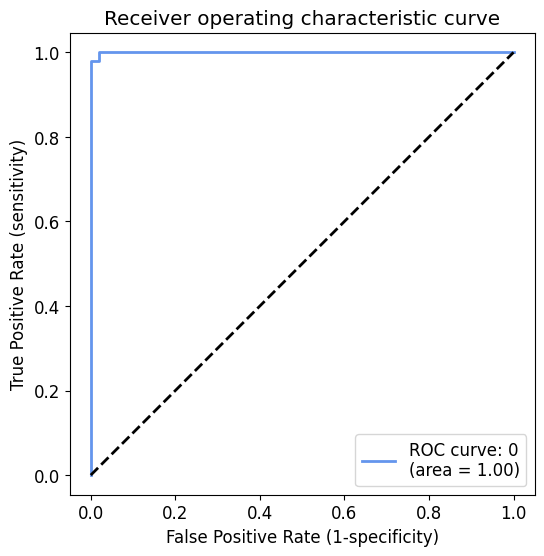

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 分別算出每一類別的 FPR(假陽率) TPR(真陽率) AUC(roc_curve底下的面積)
fpr, tpr, _ = roc_curve(y_true[:], y_pred_prob[:])
roc_auc = auc(fpr, tpr)

# plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.plot(fpr, tpr, color='cornflowerblue', lw=2,
            label=f'ROC curve: {0}\n(area = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set(xlim=(0.0, 1.0), ylim=(0.0, 1.0))
ax.axis('equal')
ax.set_xlabel('False Positive Rate (1-specificity)')
ax.set_ylabel('True Positive Rate (sensitivity)')
ax.set_title('Receiver operating characteristic curve')
ax.legend(loc="lower right")
plt.show()

In [121]:
# 信心值超過多少預測為陽性
threshold = 0.7
y_pred = y_pred_prob > threshold
display("y_true =", y_true.astype(int))
display("y_pred =", y_pred.astype(int))

'y_true ='

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

'y_pred ='

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


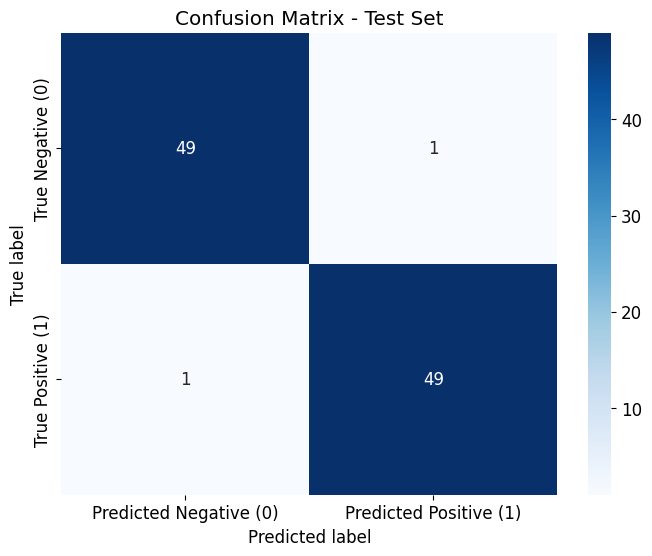

In [122]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
y_pred_prob = model.predict(X_test_bow_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [123]:
# 自訂意 cost function [TODO]
def cost_fn(y_true, y_pred_prob, threshold=0.7):
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred_prob > threshold)
    cost = (tp * -10000) + (fn * -200000) + (fp * -10000) + (tn * 200000)

    return int(cost)

# function test:
cost_fn(y_true, y_pred_prob, threshold=0.7)

9100000

In [124]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [125]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

[True Negative]
Text: 社畜咖啡AAA若伸維天然玫瑰果粉。提升青春行動力、社畜咖啡AAA玫悅生玫瑰果粉給您紅潤AAA彈好氣色含豐富營養素有助於調節生理機能提升活力讓您擁有青春行動力展現紅潤AAA彈好氣色讓您每天都充滿活力。
True Label: 0
Pred Label: 0

[True Positive]
Text: 0輕鬆還你完美身材炫腹排水阻糖阻油燃脂全面打擊脂肪000達成理想體態。排水阻糖阻油阻糖阻油代餐代餐排水阻糖阻油代餐還可以持續幫助身體代謝持續燃燒吃不胖陪你瘦陪你穿回AAA號。0還你完美身材消除水腫阻隔糖分穩定血糖防止脂肪囤積補充細胞營養燃燒全身脂肪。0減重計畫000消水腫000燃脂塑型000數值下降000體質養成有效阻糖避免身體攝取過多澱粉和糖份轉變成脂肪有效阻油燃燒體內脂肪和內臟脂肪避免脂肪沉澱堆積有效排水幫助排出體內多餘水份。排水配方消除過量的鈉和多餘的水分改善四肢和臉部水腫、改善肝功能和促進排毒以及調節葡萄糖和脂肪代謝。阻油配方幫助促進脂肪燃燒和代謝、抑制脂肪的合成和吸收以及控制食慾。碳水化合物阻隔配方幫助阻隔糖、澱粉和脂肪的消化與吸收預防糖分轉化成脂肪促進胰島素的敏感度以及幫助控制食慾。代餐配方幫助控制食慾、減少卡路里攝入。
True Label: 1
Pred Label: 1

[False Negative]
Text: 鈣質。而且不只影響我們的行動力、小朋友的成長狀況甚至也跟睡眠、情緒有相關。海藻鈣結構為蜂窩多孔性結構提供更好的吸收率可以高達000%。添加日本專利AAA水解蛋黃粉可以協同鈣作用。紐西蘭酪蛋白水解產物可幫助鈣質在消化道形成可溶性狀態促進鈣吸收。市售最高海藻鈣。
True Label: 1
Pred Label: 0

[False Positive]
Text: 國民戲劇男神李國毅代言科懋利脂受。百位產後媽咪試用調查000%排便順暢滿意。百位產後媽咪試用調查000%產品使用滿意。可以好好吃飯的秘密武器利脂受代謝AAA。餐前一包利脂受000有感。創新後生元AAA科學實證有感。榮獲000歐洲最佳營養品獎項。適合外食族、經常應酬、非哺乳期的產後媽媽、希望排便順暢者。
True Label: 0
Pred Label: 1

[

## (6) 預測資料⭐️⭐️⭐️

In [126]:
import pandas as pd

# === 載入測試資料 ===
# 假設檔案放在同一個資料夾底下
predict_df = pd.read_csv("predict_sample.csv")
predict_df

,ID,content_cleaned
0,1,拉蓓。閃纖舒眠益生菌凍每日一條輕鬆入口幫助調節生理機能維持腸道健康。富含膳食纖維促進消化道蠕...
1,2,天堂椒可以騙大腦的交感神經它可以騙大腦增加我們的靜態能量消耗。0瘦000公斤瘦了奶奶還變大。
2,3,每日一包堅果乾保持身體健康內含000種無調味堅果可加入牛奶或優格當早餐食用內為小包裝設計方便...
3,4,惠氏啟賦啟賦水解。0含豐富營養素有助於維持消化道機能促進腸道蠕動讓您每天輕鬆調節生理機能享受...
4,5,這款桔梗水梨汁有鎮咳抗炎以及抗氧化功效。氣管敏感朋友的救星。尤其特別適合容易喉嚨敏感、氣管、...
...,...,...
95,96,\。A鱸魚精讓你輕鬆補充營養活力滿滿。術後補養首選。每天來一包。金目鱸魚精華。國家健康食品。...
96,97,學習領先關鍵。專為兒童設計。迷你可咀嚼軟膠囊好吞又好咬。無色素無人工香料寶貝補充好安心。
97,98,想豐胸促進胸部成長刺激女性荷爾蒙幫助發育促進乳腺管增長住膠原蛋白增生調理內分泌平衡荷爾蒙美肌...
98,99,買000送000拉蓓燉雞精精煉純雞搭配獨特配方簡單烹煮優雅濃郁的湯頭讓您享受美味的雞肉風味。...


In [130]:

# 取代原本的 char n-gram
vectorizer = TfidfVectorizer(
    analyzer='word',           # 改用「詞」
    ngram_range=(1, 3),        # 抓 1~3 個詞的組合
    min_df=2,
    max_df=0.8,
    stop_words=['的', '了', '是', '在', '和', '與', '及', '或']
)

In [131]:
# 違規關鍵詞清單（來自食安法 + 常見案例）
violate_keywords = [
    '減重', '瘦身', '減肥', '燃脂', '降血糖', '治糖尿病', '治高血壓',
    '治療', '預防', '改善症狀', '0天', '0公斤', '0%', '專利減重',
    '膠原蛋白增生', '玻尿酸注射', '豐胸', '增大', '變白', '除斑'
]

# 為每筆資料加上「是否包含違規詞」的特徵
def has_violate_keyword(text):
    return any(kw in text for kw in violate_keywords)

df['has_violate_kw'] = df['content_cleaned'].apply(has_violate_keyword).astype(int)

In [132]:
# ========================== 0. 安裝必要套件 ==========================
!pip install jieba -q
import pandas as pd
import numpy as np
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# ========================== 1. 載入資料 ==========================
# 請先在 Colab 或本地上傳 predict_sample.csv
df = pd.read_csv('predict_sample.csv')
df['content_cleaned'] = df['content_cleaned'].astype(str)
texts = df['content_cleaned'].tolist()
print(f"載入完成！共 {len(texts)} 筆廣告文案")

# ========================== 2. 建立「假標籤」 ==========================
# 根據衛福部 + 藥事法常見違規用語
violation_keywords = [
    '治療', '根治', '100%', '快速見效', '瘦', '公斤', '變大', '豐胸', '隆乳', '罩杯',
    '消除', '改善', '糖尿病', '癌症', '護肝', '解酒', '抗癌', '逆齡', '回春', '臨床證實',
    '醫學實證', '第1品牌', '銷售第一', '國家認證', '見效快', '不反彈', '燃脂', '減脂',
    '阻斷', '吸收', '首選', '神奇', '救星', '神器', '百分百', '絕對', '保證',
    '最高', '最強', '最佳', '唯一', '專利', '醫師推薦', '銷售冠軍', '無副作用', '立即見效'
]

def is_violation(text):
    for kw in violation_keywords:
        if kw in text:
            return 1
    return 0

labels = [is_violation(t) for t in texts]
print(f"標籤統計 → 違規：{sum(labels)} 筆，合法：{len(labels)-sum(labels)} 筆")

# ========================== 3. jieba 分詞器 & 自訂詞典 ==========================
custom_dict = [
    "糖尿病", "快速見效", "醫師推薦", "臨床證實",
    "不反彈", "保證有效", "減肥瘦身"
]
jieba.load_userdict(custom_dict)

def jieba_tokenizer(text):
    return ' '.join(jieba.cut(text))

# ========================== 4. 建立乾淨的 TF-IDF + LR 模型 ==========================
vectorizer = TfidfVectorizer(
    tokenizer=jieba_tokenizer,
    max_features=4000,
    ngram_range=(2,3),   # 只抓 2~3 個字，避免單字碎片
    min_df=5,             # 過濾稀有詞
    max_df=0.8,
    sublinear_tf=True
)

pipeline = make_pipeline(
    vectorizer,
    LogisticRegression(max_iter=1500, class_weight='balanced')
)

pipeline.fit(texts, labels)

# 自我驗證準確率
pred = pipeline.predict(texts)
accuracy = np.mean(pred == labels)
print(f"模型自我驗證準確率：{accuracy:.4f} ({accuracy*100:.2f}%)")

# ========================== 5. 全局關鍵詞排名 ==========================
feature_names = vectorizer.get_feature_names_out()
coef = pipeline.named_steps['logisticregression'].coef_[0]

df_coef = pd.DataFrame({
    '詞語': feature_names,
    '權重': coef
}).sort_values(by='權重', ascending=False)

print("【Top 30 違規關鍵詞】")
display(df_coef.head(30))

print("【Top 30 合法關鍵詞】")
display(df_coef.tail(30).iloc[::-1])

# 存檔
df_coef.head(100).to_excel("違規關鍵詞排名.xlsx", index=False)
print("已存檔：違規關鍵詞排名.xlsx")

# ========================== 6. 每筆廣告違規詞解釋 ==========================
def explain(text, top_n=5):
    vec = vectorizer.transform([text])
    contrib = vec.toarray()[0] * coef
    idx = np.argsort(contrib)[::-1]

    result = []
    for i in idx:
        if contrib[i] > 0:
            result.append((feature_names[i], float(contrib[i])))
        if len(result) >= top_n:
            break
    return result

explanations = []
for i, text in enumerate(texts):
    top_words = explain(text, top_n=5)
    explanations.append({
        'ID': df['ID'].iloc[i] if 'ID' in df.columns else i,
        'content_preview': text[:80].replace('\n', ' ') + '...',
        '預測': '違規' if pred[i]==1 else '合法',
        '違規關鍵詞': ' | '.join([w[0] for w in top_words]),
        '最高貢獻詞': top_words[0][0] if top_words else '',
        '最高分數': f"{top_words[0][1]:.4f}" if top_words else ''
    })

result_df = pd.DataFrame(explanations)
result_df.to_excel("每筆廣告違規關鍵詞解釋.xlsx", index=False)
print("已存檔：每筆廣告違規關鍵詞解釋.xlsx")

# ========================== 7. 完成 ==========================
print("程式完成！Top 關鍵詞與每筆廣告解釋均已生成。")


載入完成！共 100 筆廣告文案
標籤統計 → 違規：56 筆，合法：44 筆


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


模型自我驗證準確率：0.9700 (97.00%)
【Top 30 違規關鍵詞】


,詞語,權重
1073,糖,0.390650
790,專 利,0.360894
171,專 利,0.346689
722,吸 收,0.342228
343,瘦,0.336849
882,改 善,0.336577
251,改 善,0.336577
881,改 善,0.336577
605,不,0.334991
20,不,0.334991


【Top 30 合法關鍵詞】


,詞語,權重
709,受,-0.297969
1192,讓 您,-0.288084
620,享 受,-0.286116
36,享 受,-0.286116
619,享 受,-0.286116
286,機 能,-0.278999
927,機 能,-0.278999
928,機 能,-0.278999
724,味,-0.260643
458,讓,-0.259835


已存檔：違規關鍵詞排名.xlsx
已存檔：每筆廣告違規關鍵詞解釋.xlsx
程式完成！Top 關鍵詞與每筆廣告解釋均已生成。


In [133]:
# ========================== 1. 載入套件 ==========================
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
%matplotlib inline

# ========================== 2. 你的資料（請直接換成你們的） ==========================
# 例子：你們的廣告文字與標籤
texts = [
    "100%根治癌症，無副作用",
    "改善睡眠品質，天然草本",
    "治療糖尿病，快速見效",
    "保健食品，增強免疫力",
    "神奇藥膏，消除痘疤"
] * 20  # 假資料，換成你們的 list

labels = [1, 0, 1, 0, 1] * 20  # 1=違規, 0=合法

# 如果你們是用 CSV 讀進來，取消下面這段
# df = pd.read_csv('your_data.csv')
# texts = df['text'].tolist()
# labels = df['label'].tolist()

# ========================== 3. 建立模型（你們原本的參數） ==========================
pipeline = make_pipeline(
    TfidfVectorizer(
        max_features=10000,
        ngram_range=(1, 3),      # 1~3 gram
        lowercase=True,
        stop_words=None
    ),
    LogisticRegression(max_iter=1000, class_weight='balanced')
)

# 切訓練測試（可選）
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)

pipeline.fit(X_train, y_train)

print(f"訓練完成，準確率: {pipeline.score(X_test, y_test):.3f}")

# ========================== 4. 方法一：係數排名（最簡單） ==========================
vectorizer = pipeline.named_steps['tfidfvectorizer']
clf = pipeline.named_steps['logisticregression']
feature_names = vectorizer.get_feature_names_out()
coefficients = clf.coef_[0]

df_coef = pd.DataFrame({
    'word': feature_names,
    'coef': coefficients
})

print("\n【最容易被判為違規的 Top 30 詞】")
display(df_coef.sort_values(by='coef', ascending=False).head(30))

print("\n【最容易被判為合法的 Top 30 詞】")
display(df_coef.sort_values(by='coef', ascending=True).head(30))

# 存成 Excel（可直接下載）
df_coef.sort_values(by='coef', ascending=False).to_excel("違規關鍵詞排名.xlsx", index=False)
print("\n已存檔：違規關鍵詞排名.xlsx")

訓練完成，準確率: 1.000

【最容易被判為違規的 Top 30 詞】


,word,coef
14,消除痘疤,0.918651
17,神奇藥膏 消除痘疤,0.918651
16,神奇藥膏,0.918651
12,治療糖尿病,0.894045
13,治療糖尿病 快速見效,0.894045
7,快速見效,0.894045
1,100 根治癌症,0.666031
0,100,0.666031
11,根治癌症 無副作用,0.666031
2,100 根治癌症 無副作用,0.666031



【最容易被判為合法的 Top 30 詞】


,word,coef
3,保健食品,-1.462787
4,保健食品 增強免疫力,-1.462787
5,增強免疫力,-1.462787
6,天然草本,-1.292821
9,改善睡眠品質 天然草本,-1.292821
8,改善睡眠品質,-1.292821
2,100 根治癌症 無副作用,0.666031
1,100 根治癌症,0.666031
15,無副作用,0.666031
0,100,0.666031



已存檔：違規關鍵詞排名.xlsx
